## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


In [19]:
#classify xtrain into c0 and c1 using numpy comprehension
c0_xtrain = np.array([xt for i,xt in enumerate(x_train) if y_train[i]==0])
c1_xtrain = np.array([xt for i,xt in enumerate(x_train) if y_train[i]==1])
print(c0_xtrain.shape) #(1869, 2)
print(c1_xtrain.shape) #(1881, 2)

(1869, 2)
(1881, 2)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [20]:
## Your code HERE
m1 = np.sum(c0_xtrain, axis=0) * (1/(c0_xtrain[:,0].size))
m2 = np.sum(c1_xtrain, axis=0) * (1/(c1_xtrain[:,1].size))

In [21]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [ 0.99253136 -0.99115481] mean vector of class 2: [-0.9888012   1.00522778]


## 2. Compute the Within-class scatter matrix SW

In [22]:
## Your code HERE
a = np.array([1,2])
sum1 = np.zeros(((2,2)))
sum2 = np.zeros(((2,2))) # 2*2 metrix
for i in range(0,c0_xtrain[:,0].size):
    # use np.outer to perform x*xT
    sum1 += np.outer((c0_xtrain[i,:]-m1),(c0_xtrain[i,:]-m1))
for i in range(c1_xtrain[:,0].size):
    sum2 += np.outer((c1_xtrain[i,:]-m2),(c1_xtrain[i,:]-m2))
sw = sum1+sum2

In [23]:
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3.  Compute the Between-class scatter matrix SB

In [24]:
## Your code HERE
sb = np.outer((m2-m1),(m2-m1))

In [25]:
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [26]:
## Your code HERE
from numpy.linalg import inv
w = inv(sw) @ (m2-m1)

In [27]:
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [-0.000224    0.00056237]


## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [28]:
#print(w.shape,c0_xtrain.shape)
P = (np.outer(w,w))/(w@w.T) #projection matrix
#print(P)
# P.shape=(2,2), c0_xtrain.shape(1869,2) Thus we need some transpose to perform matrix multiplication.
p0_xtrain = (P@c0_xtrain.T).T 
p1_xtrain = (P@c1_xtrain.T).T
#print(p0_xtrain.shape,p1_xtrain.shape)
p_xtest = (P@x_test.T).T 

In [29]:
print(c0_xtrain.shape)

(1869, 2)


In [30]:
k = 5
y_pred = []
for xtest in p_xtest:
    #print(xtest,xtr0,xtr1)
    c0_D = []
    c1_D = []
    #calculate the distance's square of all class0 xtrain and xtest
    for xtr0 in p0_xtrain:
        c0_D.append((xtest[0]-xtr0[0])**2+(xtest[1]-xtr0[1])**2)
    for xtr1 in p1_xtrain:
        c1_D.append((xtest[0]-xtr1[0])**2+(xtest[1]-xtr1[1])**2)
    c0_D.sort()
    c1_D.sort()
    count0 = 0
    count1 = 0
    i0 = 0
    i1 = 0
    for i in range(k):
        if(c0_D[i0]>c1_D[i1]): #class 1 is closer
            count1 += 1
            i1 += 1
        else: #class 0 is closer
            count0 += 1
            i0 += 1
    if(count0>count1): #xtest is closer to more class 0 than class 1
        y_pred.append(0)
    else:
        y_pred.append(1)



In [31]:
"""for k in range(1,6):
    y_pred = []
    for xtest in p_xtest:
        #print(xtest,xtr0,xtr1)
        c0_D = []
        c1_D = []
        #calculate the distance's square of all class0 xtrain and xtest
        for xtr0 in p0_xtrain:
            c0_D.append((xtest[0]-xtr0[0])**2+(xtest[1]-xtr0[1])**2)
        for xtr1 in p1_xtrain:
            c1_D.append((xtest[0]-xtr1[0])**2+(xtest[1]-xtr1[1])**2)
        c0_D.sort()
        c1_D.sort()
        count0 = 0
        count1 = 0
        i0 = 0
        i1 = 0
        for i in range(k):
            if(c0_D[i0]>c1_D[i1]): #class 1 is closer
                count1 += 1
                i1 += 1
            else: #class 0 is closer
                count0 += 1
                i0 += 1
        if(count0>count1): #xtest is closer to more class 0 than class 1
            y_pred.append(0)
        else:
            y_pred.append(1)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
    print("k = ", k, f"Accuracy of test-set {acc}")"""

'for k in range(1,6):\n    y_pred = []\n    for xtest in p_xtest:\n        #print(xtest,xtr0,xtr1)\n        c0_D = []\n        c1_D = []\n        #calculate the distance\'s square of all class0 xtrain and xtest\n        for xtr0 in p0_xtrain:\n            c0_D.append((xtest[0]-xtr0[0])**2+(xtest[1]-xtr0[1])**2)\n        for xtr1 in p1_xtrain:\n            c1_D.append((xtest[0]-xtr1[0])**2+(xtest[1]-xtr1[1])**2)\n        c0_D.sort()\n        c1_D.sort()\n        count0 = 0\n        count1 = 0\n        i0 = 0\n        i1 = 0\n        for i in range(k):\n            if(c0_D[i0]>c1_D[i1]): #class 1 is closer\n                count1 += 1\n                i1 += 1\n            else: #class 0 is closer\n                count0 += 1\n                i0 += 1\n        if(count0>count1): #xtest is closer to more class 0 than class 1\n            y_pred.append(0)\n        else:\n            y_pred.append(1)\n    from sklearn.metrics import accuracy_score\n    acc = accuracy_score(y_test, y_pred)\n  

In [32]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [33]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.8912


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

In [34]:
c0_xtest = np.array([xt for i,xt in enumerate(x_test) if y_test[i]==0])
c1_xtest = np.array([xt for i,xt in enumerate(x_test) if y_test[i]==1])

p_xtest = (P@x_test.T).T 
p0_xtest = (P@c0_xtest.T).T 
p1_xtest = (P@c1_xtest.T).T

Text(0.5, 1.0, 'Projection Line: w=-2.51060 , b=-0.00000')

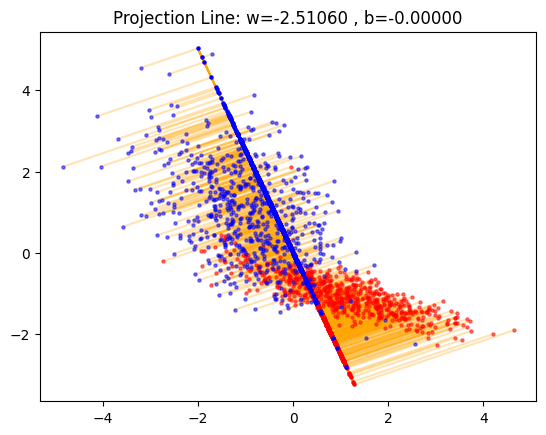

In [35]:
#x_proj_line = [data_x, proj_x]
#y_proj_line = [data_y, proj_y]
# Plot projection points
plt.scatter(c0_xtest[:,0], c0_xtest[:,1], color="red", s=5, alpha=0.5)
plt.scatter(p0_xtest[:,0], p0_xtest[:,1], color="red", s=5, zorder=1)
plt.plot(p_xtest[:,0], p_xtest[:,1], color="orange", zorder=0)
plt.scatter(c1_xtest[:,0], c1_xtest[:,1], color="blue", s=5, alpha=0.5)
plt.scatter(p1_xtest[:,0], p1_xtest[:,1], color="blue", s=5, zorder=1)

# Plot line of data point and projection points
for xt, pxt in zip(x_test,p_xtest):
    plt.plot([xt[0],pxt[0]], [xt[1],pxt[1]], color="orange", alpha=0.3, zorder=0)

slope = w[1]/w[0]
b = p0_xtest[0][1] - p0_xtest[0][0] * slope
plt.title(f'Projection Line: w=%.5f , b=%.5f' % (slope,b))